**ABOUT THE PROCESSED DATA**
  1.	CVE ID and Description: Identifiers and detailed descriptions of the vulnerabilities.
	2.	Published and Last Modified Dates: Timestamps detailing when the CVE was published and last updated.
	3.	CVSS Metrics: Scores and detailed metrics from CVSS v2, including base severity, exploitability score, impact score, and detailed vector strings explaining how the score was computed.
	4.	References: URLs to external sources that provide more information about each CVE.
	5.	Year, Month, Day of Publication: These columns are broken down from the publication date for easier access and analysis.
	6.	Cleaned Description: A processed form of the vulnerability description likely used for further analysis or machine learning.
	7.	Dominant Topic and Topic Label: These columns suggest that some form of topic modeling (like LDA) was applied to categorize the CVEs into different types.

Steps to Forecast Trending Topics

	1.	Prepare the Data: Aggregate the topic occurrences monthly.
	2.	Model the Data: Use SARIMA to model each topic separately.
	3.	Forecasting: Forecast future topic trends.

In [ ]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Load the dataset
file_path = '/content/drive/My Drive/data/cve/cve-processed-flattened-with-topic-labels.csv'
data = pd.read_csv(file_path)

# Verify if 'topic_label' column exists
if 'topic_label' in data.columns:
    # Group by 'dominant_topic' and 'topic_label' and count occurrences
    topic_counts = data.groupby(['dominant_topic', 'topic_label']).size().reset_index(name='Count')
    print("Topic counts with labels:\n", topic_counts)
else:
    print("The 'topic_label' column does not exist in the dataset.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-9-9d1dc8bfec42>:9: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


Topic counts with labels:
     dominant_topic                  topic_label  Count
0                0            Denial of Service  23391
1                1         PHP Remote Execution  13244
2                2                SQL Injection  21991
3                3   Cross-site Scripting (XSS)  27837
4                4        Sensitive Information   9075
5                5  Unspecified Vulnerabilities  10507
6                6              Buffer Overflow  25182
7                7       Service Denial (Crash)  21414
8                8         Privilege Escalation  19260
9                9             Mozilla Exploits  16011
10              10          Directory Traversal  13714
11              11      Windows Vulnerabilities   8044
12              12        Authentication Bypass  22042
13              13           Multiple Overflows  14030


# Analyzing CVE Topic Trends

## Overview
The following word clouds represent the most prevalent topics extracted from a dataset of Common Vulnerabilities and Exposures (CVEs). Each word cloud visualizes the frequency and association of terms related to different types of cybersecurity vulnerabilities and exploits as cataloged over recent years.

## Key Points

### Term Frequency
The size of each term within the word cloud indicates its frequency across CVE reports for that topic. Larger terms signify more common issues or terms used in the CVE descriptions.

### Topic Identification
Each plot is labeled with a topic name and the count of CVEs associated with that topic, providing a clear idea of which vulnerabilities are most reported or discussed within each category.

### Security Insights
- **High Frequency Terms**: Terms like "remote", "attacker", and "execute" commonly appear across different topics, underscoring the widespread concern about remote exploitation and the execution of arbitrary code.
- **Topic Specific Terms**: Specific terms give insight into the nature of the vulnerabilities:
  - "SQL Injection" and "Cross-site Scripting (XSS)" highlight common web application vulnerabilities.
  - "Buffer Overflow" indicates issues where software, written in languages that do not enforce memory safety, allows unintended code execution.
  - "Privilege Escalation" and "Directory Traversal" reflect concerns about attackers gaining unauthorized access or escalating their privileges within a system.


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


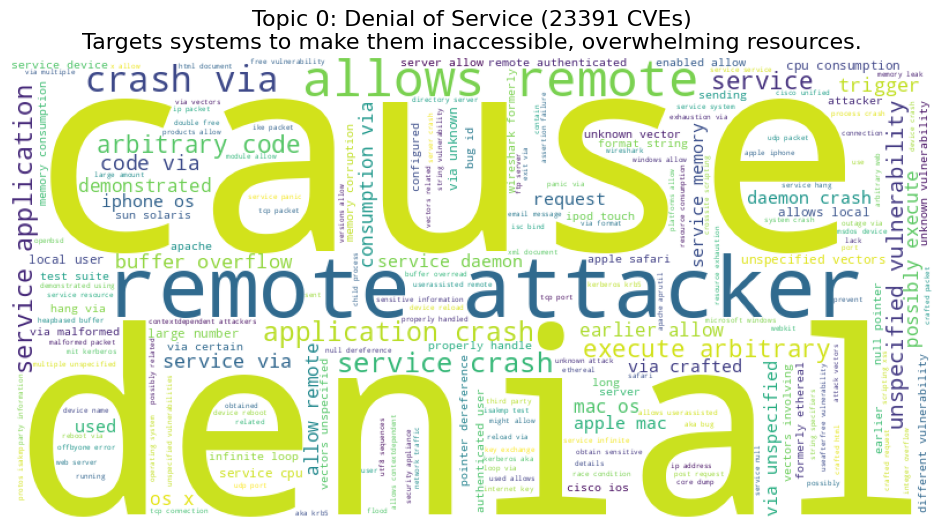

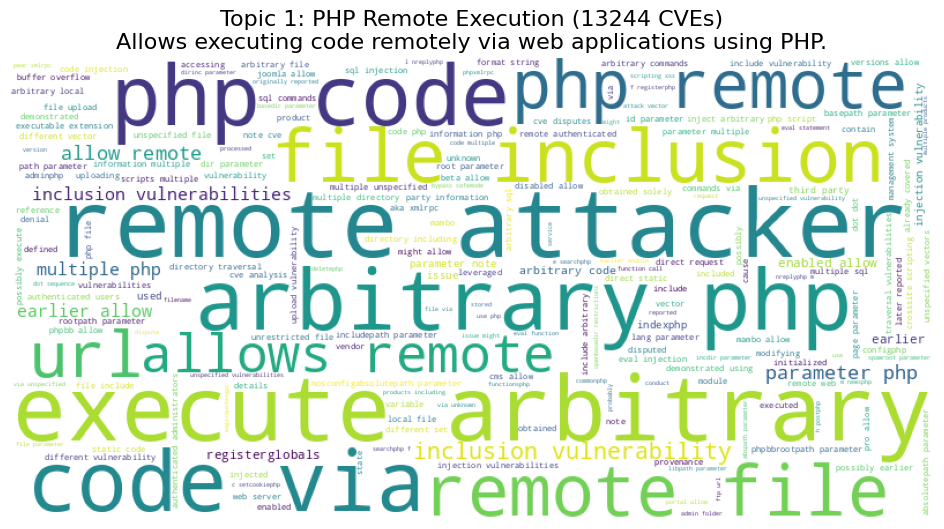

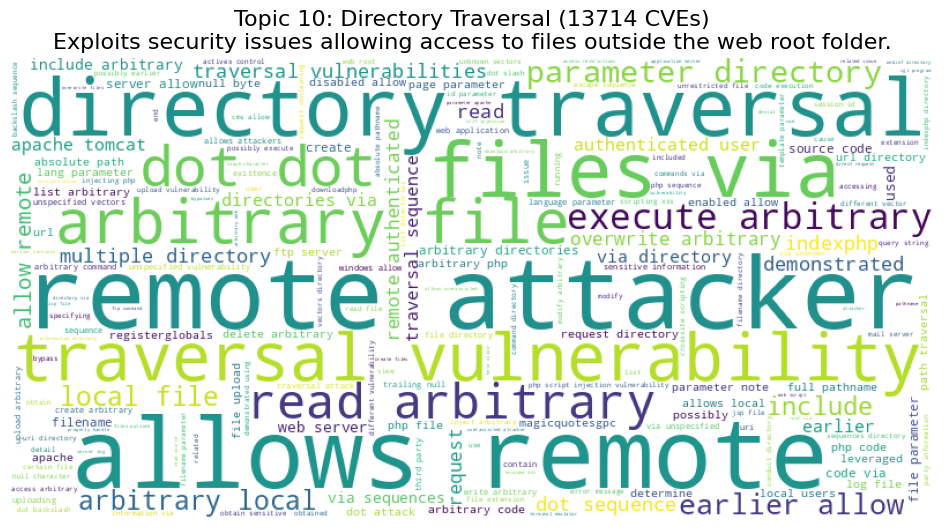

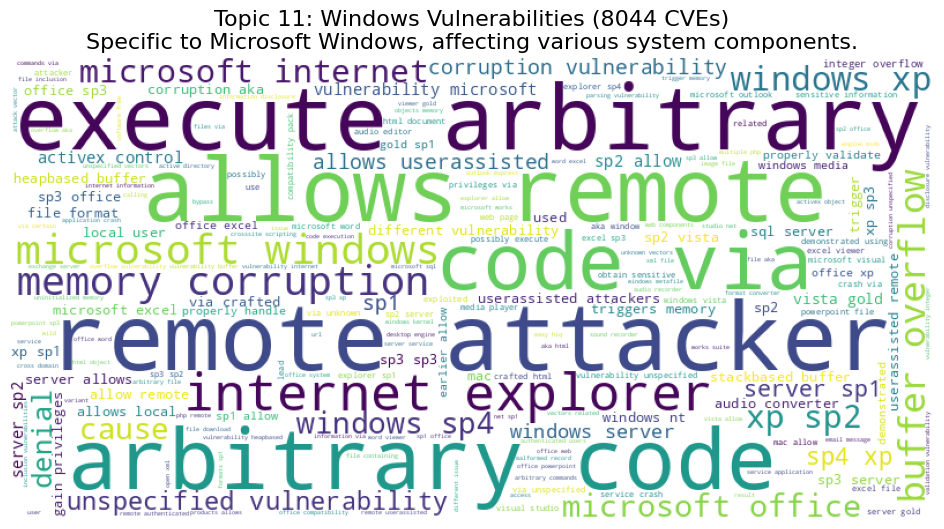

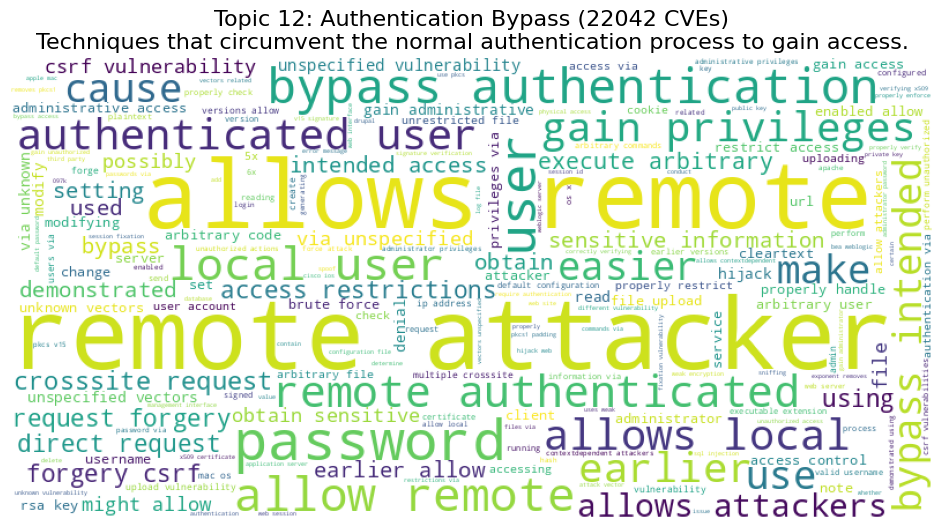

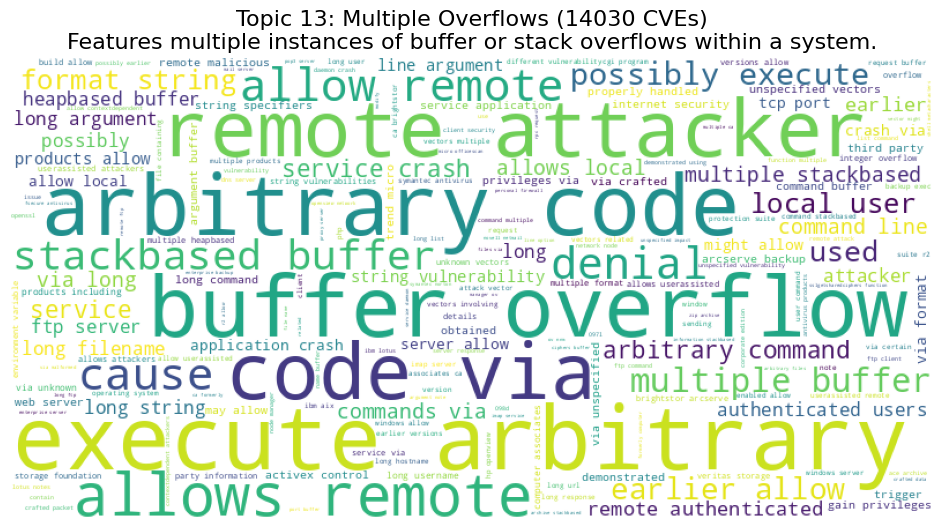

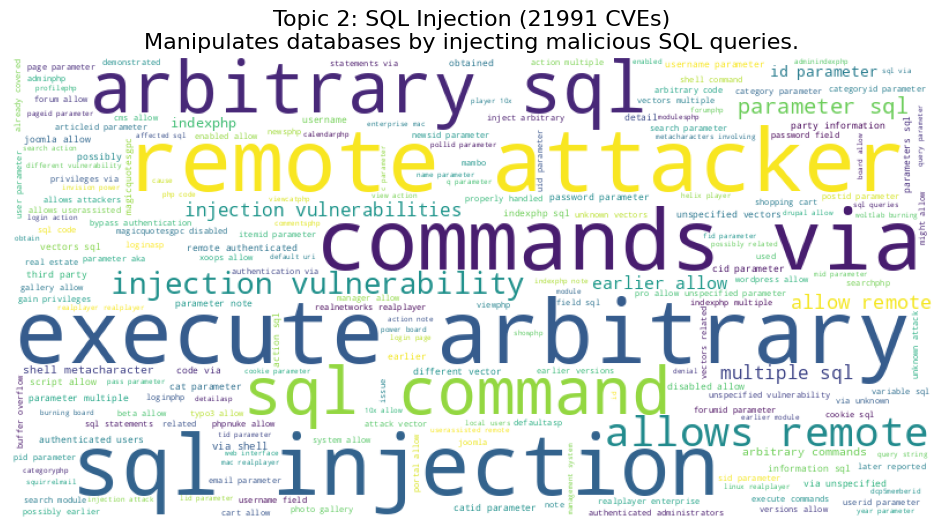

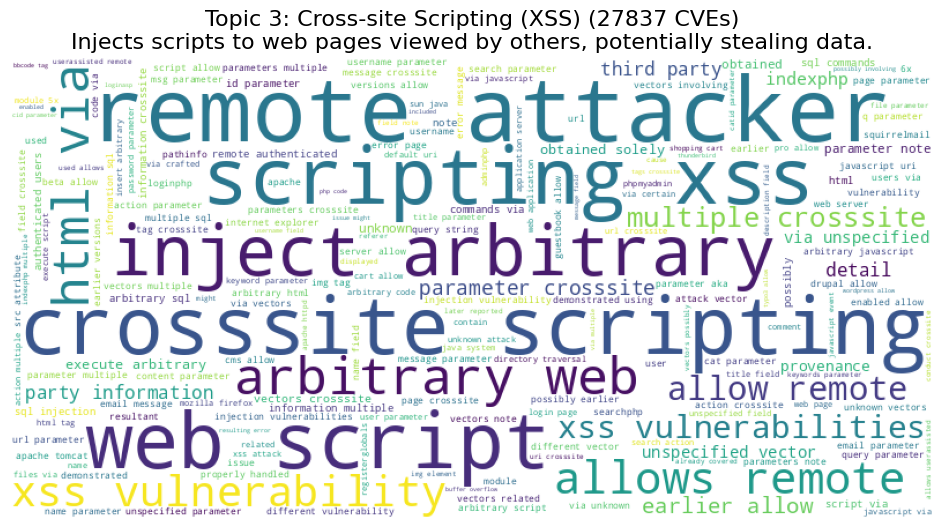

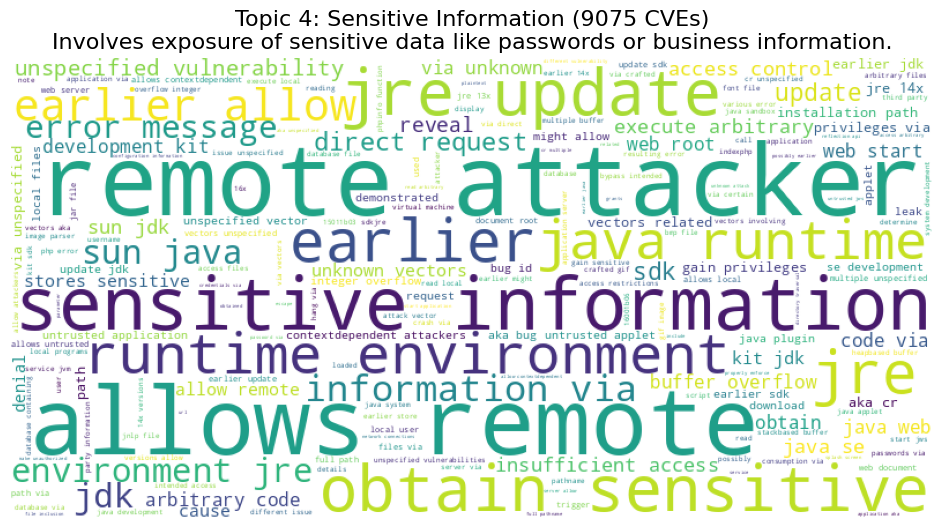

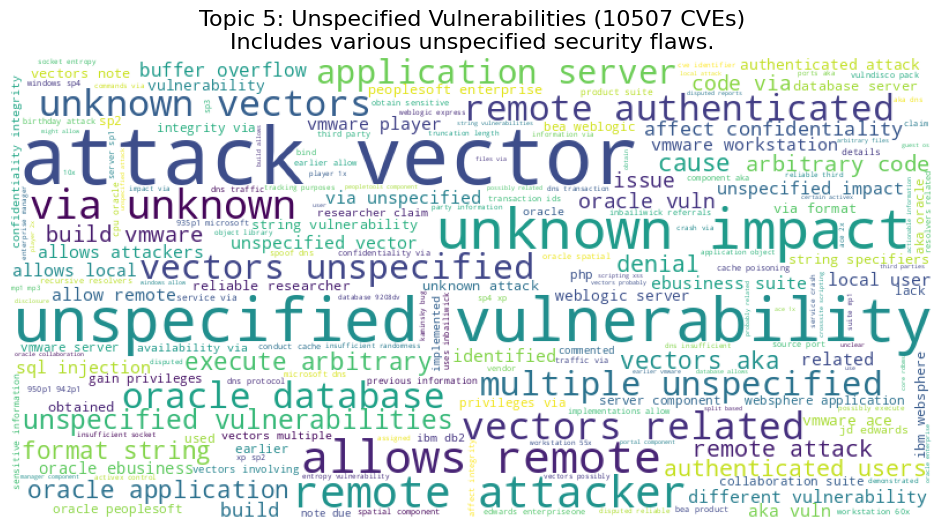

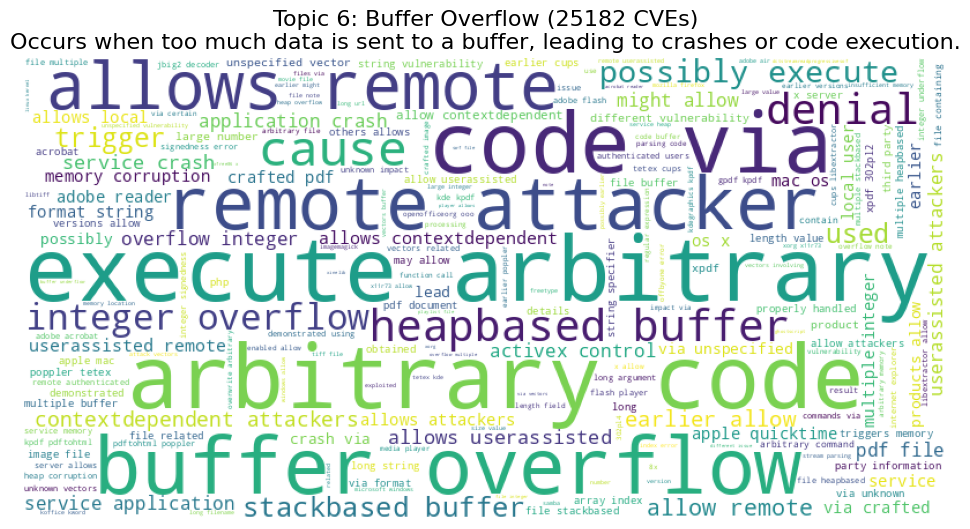

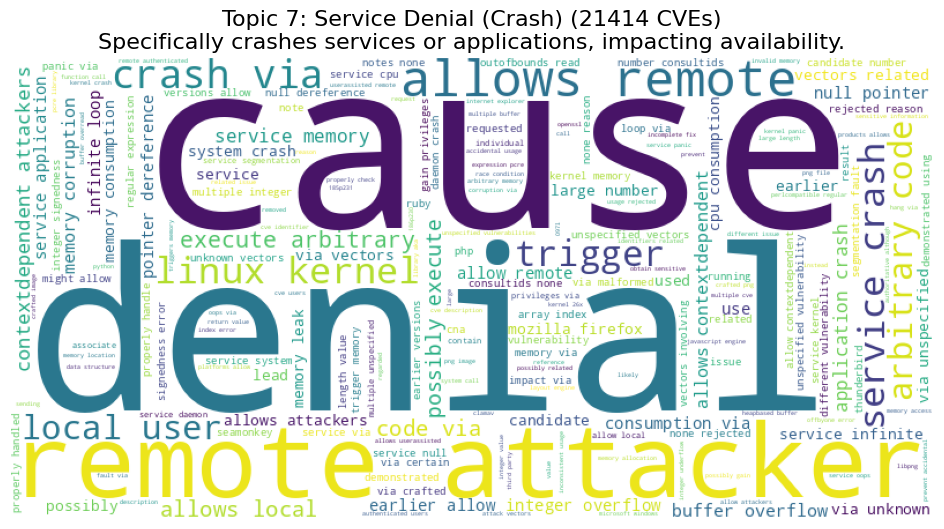

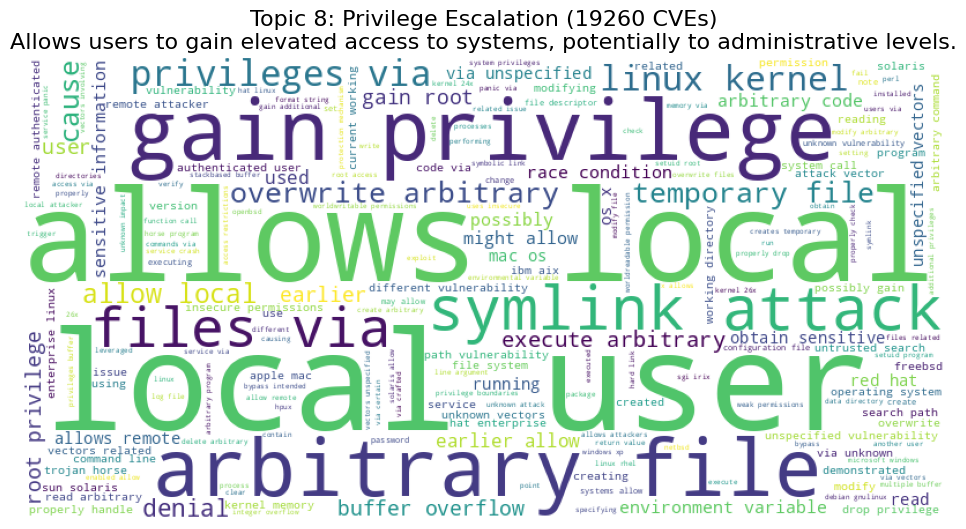

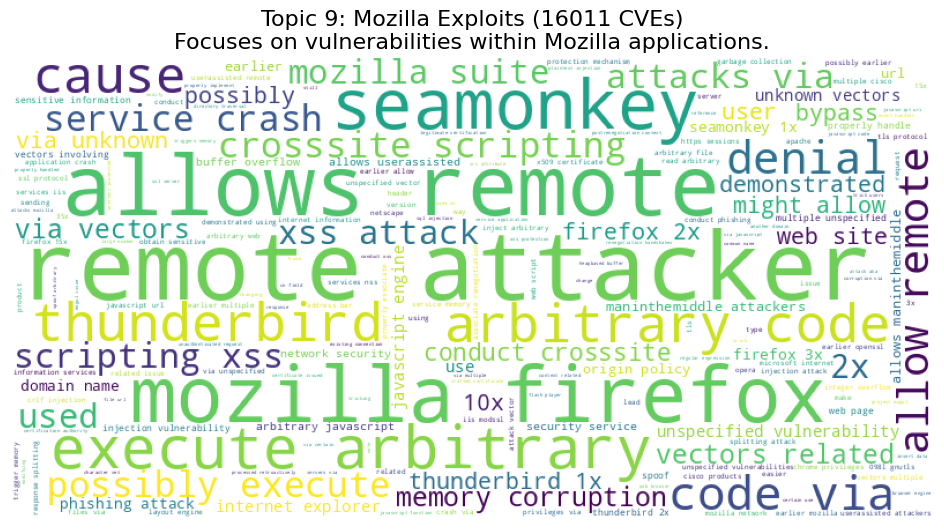

In [ ]:
from google.colab import drive
from PIL import Image
import matplotlib.pyplot as plt
import os

# Mount Google Drive
drive.mount('/content/drive')

# Path to the directory containing images
dir_path = '/content/drive/My Drive/data/cve/'

# Dictionary of topic labels and counts
topic_info = {
    0: ("Denial of Service", 23391),
    1: ("PHP Remote Execution", 13244),
    2: ("SQL Injection", 21991),
    3: ("Cross-site Scripting (XSS)", 27837),
    4: ("Sensitive Information", 9075),
    5: ("Unspecified Vulnerabilities", 10507),
    6: ("Buffer Overflow", 25182),
    7: ("Service Denial (Crash)", 21414),
    8: ("Privilege Escalation", 19260),
    9: ("Mozilla Exploits", 16011),
    10: ("Directory Traversal", 13714),
    11: ("Windows Vulnerabilities", 8044),
    12: ("Authentication Bypass", 22042),
    13: ("Multiple Overflows", 14030)
}

# Dictionary of topic descriptions
descriptions = {
    0: "Targets systems to make them inaccessible, overwhelming resources.",
    1: "Allows executing code remotely via web applications using PHP.",
    2: "Manipulates databases by injecting malicious SQL queries.",
    3: "Injects scripts to web pages viewed by others, potentially stealing data.",
    4: "Involves exposure of sensitive data like passwords or business information.",
    5: "Includes various unspecified security flaws.",
    6: "Occurs when too much data is sent to a buffer, leading to crashes or code execution.",
    7: "Specifically crashes services or applications, impacting availability.",
    8: "Allows users to gain elevated access to systems, potentially to administrative levels.",
    9: "Focuses on vulnerabilities within Mozilla applications.",
    10: "Exploits security issues allowing access to files outside the web root folder.",
    11: "Specific to Microsoft Windows, affecting various system components.",
    12: "Techniques that circumvent the normal authentication process to gain access.",
    13: "Features multiple instances of buffer or stack overflows within a system."
}

# List all files and filter by PNG
files = [f for f in os.listdir(dir_path) if f.endswith('.png')]
files.sort()  # Sorting to maintain order

# Plot each image individually
for file in files:
    # Extract topic number from filename
    topic_num = int(file.split('_')[2].split('.')[0])

    # Open image
    img_path = os.path.join(dir_path, file)
    img = Image.open(img_path)

    # Create a new figure
    plt.figure(figsize=(12, 6))
    plt.imshow(img)
    plt.axis('off')  # Hide axes
    plt.title(f'Topic {topic_num}: {topic_info[topic_num][0]} ({topic_info[topic_num][1]} CVEs)\n{descriptions[topic_num]}',
              fontsize=16)  # Set larger font size for better visibility
    plt.show()


In [ ]:
# Ensure 'published' is set as the datetime index
if 'published' not in data.index.names:
    data['published'] = pd.to_datetime(data.reset_index()['published'])
    data.set_index('published', inplace=True)


In [ ]:
# Group by 'dominant_topic' and month, and count occurrences
monthly_topic_data = data.groupby(['dominant_topic', pd.Grouper(freq='M')]).size().unstack(fill_value=0).transpose()


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Example of fitting a SARIMA model for one topic
topic_number = 0  # Replace this with the topic number you are analyzing
topic_ts = monthly_topic_data[topic_number]

# SARIMA model parameters to be determined based on ACF/PACF plots or grid search
sarima_model = SARIMAX(topic_ts, order=(1, 1, 1), seasonal_order=(0, 1, 1, 12))
sarima_result = sarima_model.fit()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  225
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -377.699
Date:                            Thu, 15 Aug 2024   AIC                            763.399
Time:                                    09:17:00   BIC                            776.825
Sample:                                         0   HQIC                           768.825
                                            - 225                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2702      0.104      2.604      0.009       0.067       0.474
ma.L1         -0.7809      0.066   

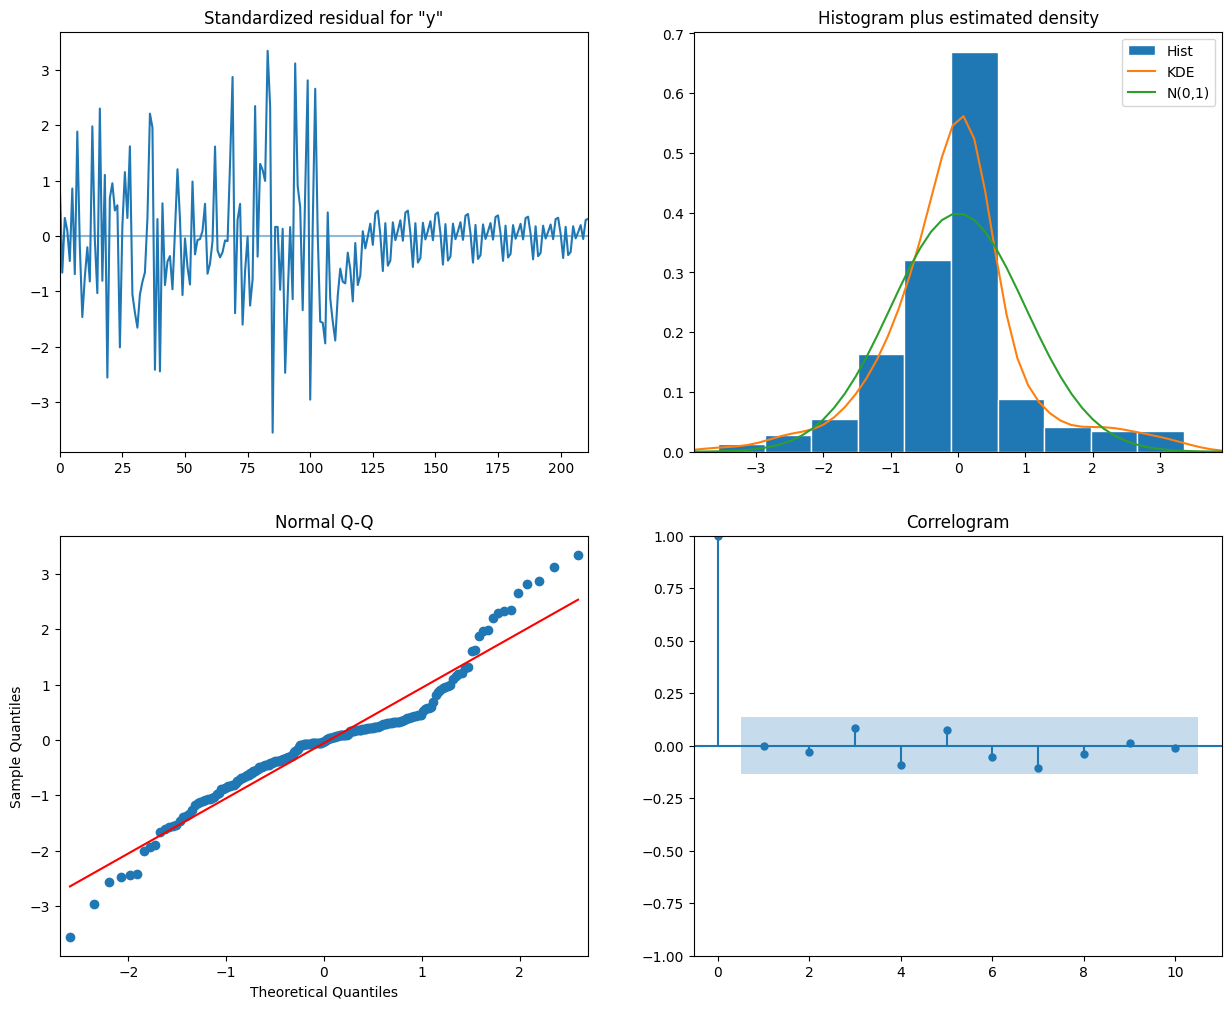

In [ ]:
print(sarima_result.summary())

# Optional: Check diagnostic plots to validate model assumptions
sarima_result.plot_diagnostics(figsize=(15, 12))
plt.show()
